## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random 
import cv2
from tensorflow.contrib.layers import flatten
import tensorflow as tf
import csv
from numpy import array
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import time
import matplotlib.gridspec as gridspec
import cv2
import pickle

In [2]:
# TODO: Fill this in based on where you saved the training and testing data
_
training_file = "./traffic-signs-data/train.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_o, y_train = train['features'], train['labels']
X_test_o, y_test = test['features'], test['labels']



---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [4]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train_o)

# TODO: Number of testing examples.
n_test = len(X_test_o)
# TODO: What's the shape of an traffic sign image?
image_shape = (X_train_o[0].shape)

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
#count of each type image
unique, index, counts = np.unique(y_train, return_index = True, return_counts=True)
#print (np.asarray((unique, counts, index)).T.shape)
#print (np.sum(counts))
#print (np.asarray((unique, index, counts)).T)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


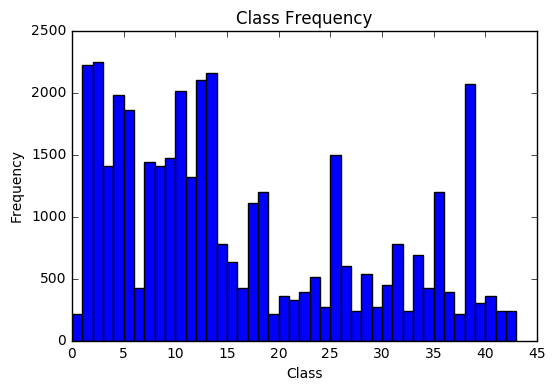

In [5]:
#Plotting the bar graph of the frequency of classes 
plt.bar(unique, counts, 1)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

38
0


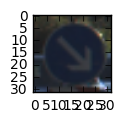

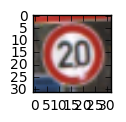

In [11]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

# Visualizations will be shown in the notebook.

index1 = random.randint(0,len(X_train_o))
image1 = X_train_o[index1].squeeze()
index2 = 19
image2 = X_train_o[index2].squeeze()


plt.figure(figsize = (1,1))
plt.imshow(image1, cmap = 'gray')
print (y_train[index1])
plt.figure(figsize = (1,1))
plt.imshow(image2, cmap = 'gray')
print (y_train[index2])

In [12]:
#See the different class of signs 

with open('signnames.csv', 'r') as f:
    reader = csv.reader(f)
    class_names = dict(reader)

# choose one sample to use for visualization from each class
sample_class_image = []
for n in range(n_classes):
    sample_class_image.append(np.random.choice(np.where(y_train==n)[0]))


show_samples = X_train_o[sample_class_image,:,:,:]


In [13]:
## plot classes in a grid

# function to plot sample images in a grid
def plot_classes(box, grid_w, grid_h, stitch_layers=True):
    fig = plt.figure()
    for j in range(box.shape[0]):
        ax = fig.add_subplot(grid_h, grid_w, j+1)
        ax.imshow(box[j].squeeze(), cmap = 'gray')
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
    plt.tight_layout()

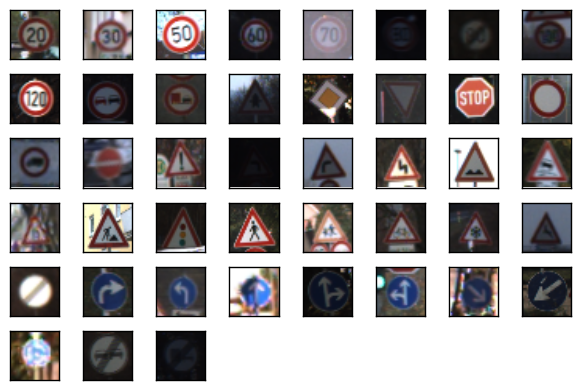

In [14]:
plot_classes(show_samples, 8,6)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [15]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

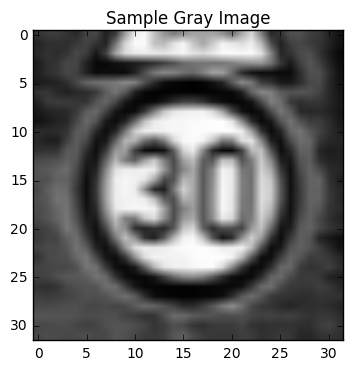

In [16]:
# convert the the training images to grayscale
X_train = []
for i in range (np.shape(X_train_o)[0]):
    img = cv2.cvtColor(X_train_o[i,:,:,:], cv2.COLOR_BGR2GRAY)
    img = img.squeeze()
    img = img.reshape(32,32,1)
    X_train.append(img)

# show a sample image converted
plt.imshow(X_train[1000].squeeze(), cmap = 'gray')
plt.title('Sample Gray Image')
plt.show()

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
I have converted the color images into gray scale images as the traffic signs have similar color combinations and thus these colors dont give any significant meaning/ feature to be picked up by the network. Hence I have droped the RGB values and concentrated mainly on the structure of the signs in gray scale.

In [19]:
#Transform the image
def transform_image(img,ang_range,shear_range,trans_range):
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    #print (img.shape)
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    return img

In [20]:
import random
total_images_per_set = 2500
for i in range(n_classes):
    print (i),
    to_loop = int((total_images_per_set-counts[i])/100)
#    print (to_loop+1)
#    print (index[i])
#    print (counts[i])
    if to_loop < 0:
        continue
    for j in range(to_loop+1):
        m = random.randint(index[i],index[i] + counts[i]-1)
#        print ("m = ",m)
        index2 = m
        #print (X_train[index2].shape)
        #image2 = X_train[index2].squeeze()
        image2 = X_train[index2]
        for k in range(100):
            img = transform_image(image2,10,10,5)
            img = img.reshape(1,32,32,1)
            X_train = np.concatenate((X_train,img), axis = 0)
            y_train = np.append(y_train,unique[i])
        #plt.imshow(image2)
        #plt.show()
    #image2 = X_train[index[i]].squeeze()
    #plt.imshow(image2)
    #plt.show()
    #n_train = len(X_train)
    #n_y_train = len(y_train)
    #print("Number of training examples = ", n_train)
    #print("Number of training results = ", n_y_train)
    #print (y_train)

0


KeyboardInterrupt: 

In [ ]:
#check the size of the data and counts of X_train_augmented
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)
print (X_train.shape)
print (y_train.shape)
# TODO: What's the shape of an traffic sign image?
image_shape = (X_train_o[0].shape)

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
#count of each type image
unique, index, counts = np.unique(y_train, return_index = True, return_counts=True)

In [ ]:
plt.bar(unique, counts, 1)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#save the data in the file for future use
train_augmented_file = "./traffic-signs-data/train_augmented_gray.p" 
output = open(train_augmented_file, 'wb')

mydict2 = {'features': 1, 'labels': 2}
mydict2['features'] = X_train
mydict2['labels'] = y_train
pickle.dump(mydict2, output)
output.close()


In [ ]:
# normalize dataset
X_train = (np.array(X_train) - 128.0)/256.0

In [ ]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

X_train, y_train = shuffle(X_train,y_train)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

print (len(X_train), len(y_train))
print (len(X_validation),len(y_validation))


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
The validation data is created by splitting the training data in the ratio of 80:20. 20% being the validation set.

Additional data was generated to make classification perspective and skew invariant since sign classifier will be applied on images whose plane are parallel to the plane of the camera. Images will mostly appear skewed or 'perspective-transformed' in real life applications. So a transormation of the images per class is done to generate 2500 images per class. Rotation, Skewing and translation are applied to these images to get the transormed 2500 images. Total we have 2500*43 about 111000 images. 

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [ ]:
EPOCHS = 50
BATCH_SIZE = 256

def SignTraffic(x, keep_prob):
    mu = 0
    sigma = 0.1
    #Layer1 32*32*1 --> 28*28*16 
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5,5,1,16), mean = mu, stddev = sigma), name = 'conv1_W')
    conv1_b = tf.Variable(tf.constant(0.1, shape = [16]), name = 'conv1_b')
    conv1 = tf.add(tf.nn.conv2d(x,conv1_W, strides = [1,1,1,1], padding = 'VALID') , conv1_b)
    #Layer1 activation 
    conv1 = tf.nn.relu(conv1)
    #Layer1 pooling 28*28*16 --> 14*14*16
    conv1 = tf.nn.max_pool(conv1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    #Layer2  14*14*16 --> 10*10*32
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5,5,16,32), mean = mu , stddev = sigma), name = 'conv2_W')
    conv2_b = tf.Variable(tf.constant(0.1, shape = [32]), name = 'conv2_b')
    conv2 = tf.add(tf.nn.conv2d(conv1, conv2_W, strides = [1,1,1,1], padding = 'VALID') , conv2_b)
    #Layer2 activation
    conv2 = tf.nn.relu(conv2)
    #Later2 pooling 10*10*32 --> 5*5*32 
    conv2 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    #Flatten 5*5*32 --> 800
    fc0 = flatten(conv2)
    
    #Layer3  800--> 516
    fc1_W = tf.Variable(tf.truncated_normal(shape = (800,516), mean = mu , stddev = sigma), name = 'fc1_W')
    fc1_b = tf.Variable(tf.constant(0.1, shape = [516]), name = 'fc1_b')
    fc1 = tf.add(tf.matmul(fc0, fc1_W) , fc1_b)
    #Layer3 activation
    fc1 = tf.nn.relu(fc1)
    
    #Dropout 
    fc1 = tf.nn.dropout(fc1,keep_prob)
    
    
    #Layer4 516--> 360
    fc2_W = tf.Variable(tf.truncated_normal(shape = (516,360), mean = mu , stddev = sigma), name = 'fc2_W')
    fc2_b = tf.Variable(tf.constant(0.1, shape = [360]), name = 'fc2_b')
    fc2 = tf.add(tf.matmul(fc1,fc2_W) , fc2_b)
    #Layer4 activation
    fc2 = tf.nn.relu(fc2)
    
    #Dropout 
    fc2 = tf.nn.dropout(fc2,keep_prob)
    
    #Layer5 360--> 43
    fc3_W = tf.Variable(tf.truncated_normal(shape = (360,43), mean = mu, stddev = sigma), name = 'fc3_W')
    fc3_b = tf.Variable(tf.constant(0.1, shape =[43]), name = 'fc3_b')
    logits = tf.add(tf.matmul(fc2,fc3_W) , fc3_b)
    
    return logits 
    
    

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

Layer 1: Convolution of 5x5 kernel, 1 stride and 16 feature maps Activation: ReLU Pooling 1: 2x2 kernel and 2 stride

Layer 2: Convolution of 5x5 kernel, 1 stride and 32 feature maps Activation: ReLU Pooling 2: 2x2 kernel and 2 stride

Layer 3: Fully connected layer with 516 units Activation: ReLU with dropout of 25%

Layer 4: Fully connected layer with 360 units Activation: ReLU with dropout of 25%

Layer 5: Fully connected layer with 43 units for network output Activation to Softmax

In [21]:
### Train your model here.
### Feel free to use as many code cells as needed.

save_file = 'sign_classify.ckpt'

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y,43)


In [ ]:
#Traning
starttime = time.clock()
rate = 0.001
logits = SignTraffic(x,keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits,one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=rate)
training_operation = optimizer.minimize(loss_operation)

In [ ]:
#Model Evaluation 
correct_prediction = tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data, keep_prob):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0,num_examples,BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict = {x:batch_x, y:batch_y, keep_prob : 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [ ]:
#Train the model 
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    print ("Training...")
    
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train,y_train)
        for offset in range (0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset : end], y_train[offset:end]
            sess.run(training_operation, feed_dict = {x: batch_x, y: batch_y, keep_prob : 0.5})
        validation_accuracy = evaluate(X_validation, y_validation, keep_prob)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess,save_file )
    print("Model saved")

    
endtime = time.clock()
print("execution took",endtime-starttime,"seconds")


In [ ]:
###*Test the Model*

In [ ]:
#Test the model here, clear the previous model

drop_prob = 1.0
#convert to gray scale images
X_test_gray = []
for i in range (np.shape(X_test)[0]):
    img = cv2.cvtColor(X_test[i,:,:,:], cv2.COLOR_BGR2GRAY)
    img = img.squeeze()
    img = img.reshape(32,32,1)
    X_test_gray.append(img)

# normalize dataset [naive]
X_test_gray = (np.array(X_test_gray) - 128.0)/256.0

print (X_test.shape)
print (X_test_gray.shape)


In [ ]:

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_gray, y_test, keep_prob )
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
    

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer**
    
Following are used in training the model

Optimizer: Adam optimizer with learning rate of 0.001

Batch size: 256

Epochs: 100

Hyperparameters: Weight initialization with mean of 0 and standard deviation of 0.1, Dropout keep-probability of 0.25 for training and 1.0 for evaluation

**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
Base model of the network is the Lenet architecture. The depth of the corresponding layers were adjusted depending upon the output classes 43 and accordingly scaled back the other initial layers.

As I had generated images 1,12,000 in number I had to select a higher batch size of 256 and epoch of 200 initially, but I observed that the accuracy dint improve much after 100 epochs. So I stopped the training at 100 epochs to prevent overfitting.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

In [ ]:
no_of_imgs = 25
disp_imgs = []
disp_imgs_gray = []
for n in range(no_of_imgs):
    image = cv2.imread('model_traffic_signs/'+str(n+1)+'.jpg')
    dim = (32,32)

    resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
    resized = cv2.cvtColor(resized, cv2.COLOR_RGB2BGR)
    
    disp_imgs.append(np.asarray(resized))
    
    resized = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)
    disp_imgs_gray.append(np.asarray(resized))

In [ ]:
# normalize new test data
test_imgs_gray = ((np.array(disp_imgs_gray)-128.0)/256.0).reshape(no_of_imgs,32,32,1)
#See the different class of signs 

with open('signnames.csv', 'r') as f:
    reader = csv.reader(f)
    class_names = dict(reader)

with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('sign_classify.ckpt.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('./'))
    
    # model evaluation
    prediction = tf.argmax(logits, 1)

    test_prediction = sess.run(
        prediction,
        feed_dict={x: test_imgs_gray, keep_prob: drop_prob})
for i in range(no_of_imgs):
    if i%5 == 0:
        print (" ")
    print('Prediction: {} \t| {}'.format(test_prediction[i], 
                                            class_names[str(test_prediction[i])]))

In [ ]:
plot_classes(np.array(disp_imgs), 5,5)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
The model had a validation accuracy of about 98% and acuuracy of 94% on the test samples. But when i ran the model with the images from the internet things looked different. It looks like the model had learnt the features of the images and had failed to generalise to a higher degree.   

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
# get the softmax probabilities for 3 best prediction probabilities.
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('sign_classify.ckpt.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('./'))
    
    # model evaluation
    prediction = tf.nn.softmax(logits)

    test_prediction = sess.run(tf.nn.top_k(
        prediction,k=5),
        feed_dict={x: test_imgs_gray , keep_prob: drop_prob})

#print('Predictions: {}'.format(test_prediction))

In [ ]:
# plot visualization of softmax probabilities
index = np.arange(5)
probabilities, predict_classes = test_prediction

candidates = [4,5,12,15,22]
for i,im in enumerate(candidates):
    
    plt.subplot(2,1,1)
    plt.imshow(disp_imgs[im])
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    
    plt.subplot(2,1,2)
    plt.barh(index, probabilities[im], height=0.5, align='center')
    plt.yticks(index,[class_names[str(predict_classes[im][j])] for j in index] )
    plt.show()


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.